대여소 ID, 구 단위 저장


In [7]:
import numpy as np
import pandas as pd


data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')

대여소_data = data[['대여소_ID', '주소1']]

대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')

강남_대여소_ID = 대여소_data.loc[대여소_data['주소1'] == '강남', '대여소_ID']
강남_대여소_ID_df = pd.DataFrame({'대여소_ID': 강남_대여소_ID})

print(강남_대여소_ID)

36       ST-966
39       ST-963
40       ST-962
41       ST-961
42       ST-960
         ...   
3090    ST-1174
3091    ST-1173
3092    ST-1172
3093    ST-1171
3094    ST-1170
Name: 대여소_ID, Length: 191, dtype: object


/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_4742/3055752527.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


In [40]:
type(강남_대여소_ID)

pandas.core.series.Series

### 미세먼지

In [8]:
import numpy as np
import pandas as pd

data5 = pd.read_csv('../../Data/기상청/미세먼지.csv')

미세먼지_강남구_data = data5[data5['측정소명']=='강남구']
미세먼지_강남구_data = 미세먼지_강남구_data.rename(columns={'측정일시': '기준_날짜'})
미세먼지 = 미세먼지_강남구_data[['기준_날짜','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]

print('미세먼지')
print(미세먼지)

미세먼지
         기준_날짜  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0     20230101       52.0        36.0
25    20230102       24.0        11.0
50    20230103       29.0        15.0
75    20230104       35.0        22.0
100   20230105       47.0        32.0
...        ...        ...         ...
9000  20231227       69.0        51.0
9025  20231228       48.0        37.0
9050  20231229       44.0        33.0
9075  20231230       42.0        33.0
9100  20231231       23.0        18.0

[365 rows x 3 columns]


In [9]:
미세먼지_2023 = 미세먼지.reset_index()[['기준_날짜', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]
미세먼지_2023

,기준_날짜,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,20230101,52.0,36.0
1,20230102,24.0,11.0
2,20230103,29.0,15.0
3,20230104,35.0,22.0
4,20230105,47.0,32.0
...,...,...,...
360,20231227,69.0,51.0
361,20231228,48.0,37.0
362,20231229,44.0,33.0
363,20231230,42.0,33.0


In [10]:
미세먼지_2023['기준_날짜'].dtype

dtype('int64')

In [11]:
미세먼지_2023['기준_날짜'] = (미세먼지_2023['기준_날짜'].astype(str).str[0:4]) + '-' + (미세먼지_2023['기준_날짜'].astype(str).str[4:6]) + '-' + (미세먼지_2023['기준_날짜'].astype(str).str[6:8])
미세먼지_2023['기준_날짜'] = pd.to_datetime(미세먼지_2023['기준_날짜'])
print(미세먼지_2023['기준_날짜'])

0     2023-01-01
1     2023-01-02
2     2023-01-03
3     2023-01-04
4     2023-01-05
         ...    
360   2023-12-27
361   2023-12-28
362   2023-12-29
363   2023-12-30
364   2023-12-31
Name: 기준_날짜, Length: 365, dtype: datetime64[ns]


In [12]:
미세먼지_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   기준_날짜       365 non-null    datetime64[ns]
 1   미세먼지(㎍/㎥)   365 non-null    float64       
 2   초미세먼지(㎍/㎥)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


In [13]:
미세먼지_2023.describe()

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,365.000000,365.000000
mean,37.260274,19.391781
std,25.122572,11.450440
min,3.000000,1.000000
25%,22.000000,12.000000
50%,32.000000,17.000000
75%,45.000000,24.000000
max,246.000000,86.000000


### 이상치 확인

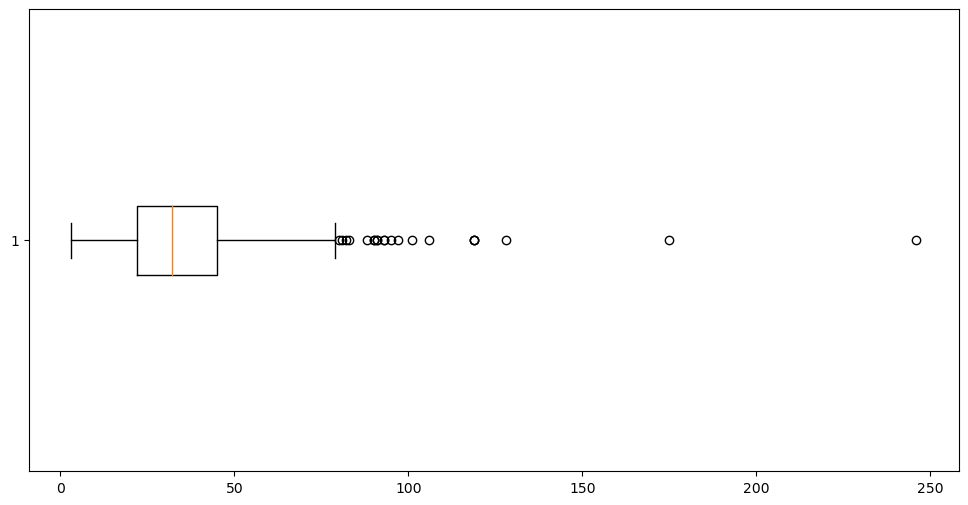

In [127]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.boxplot(미세먼지_2023['미세먼지(㎍/㎥)'], vert=False)

plt.show()

### 미세먼지 시각화

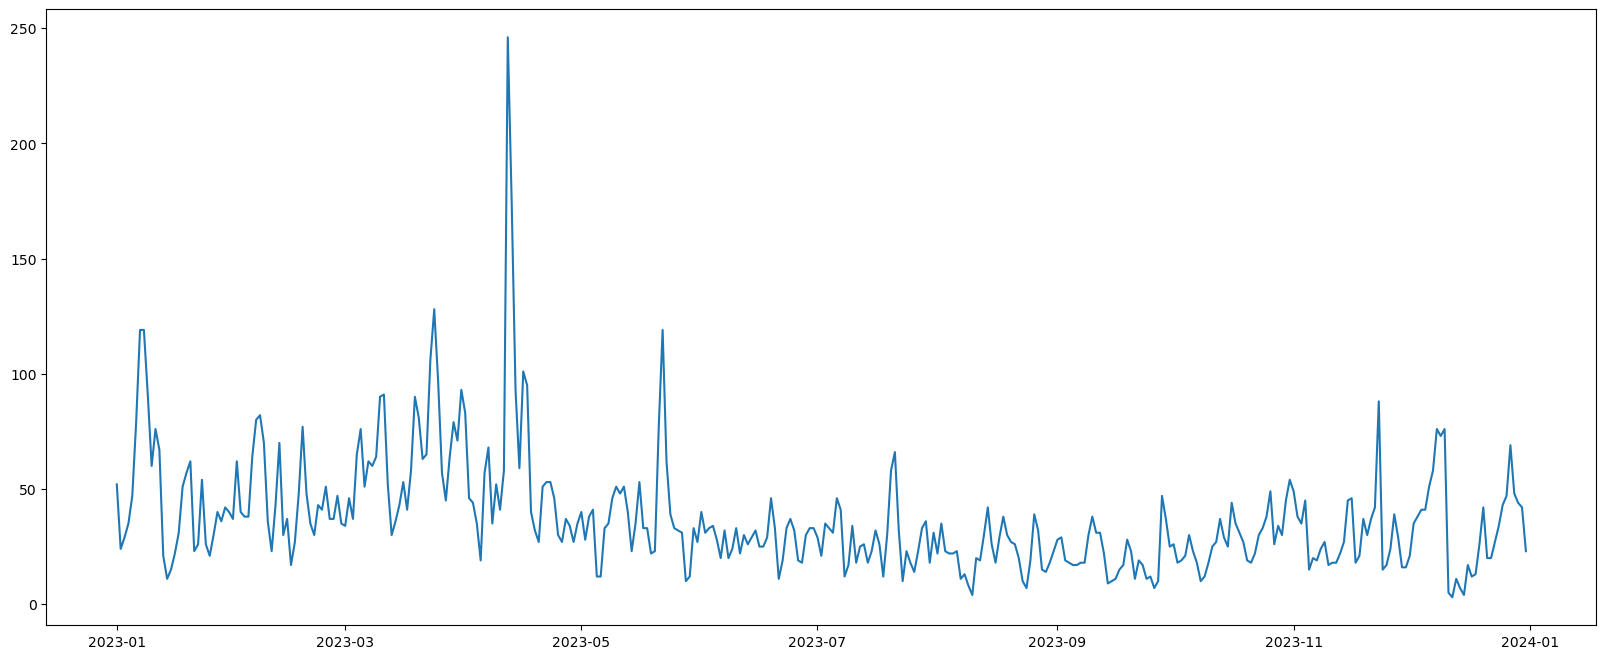

In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20, 8))

ax.plot(미세먼지_2023['기준_날짜'], 미세먼지_2023['미세먼지(㎍/㎥)'], label = '미세먼지')
# ax.plot(미세먼지_2023['기준_날짜'], 미세먼지_2023['초미세먼지(㎍/㎥)'], label = '초미세먼지')

plt.show()

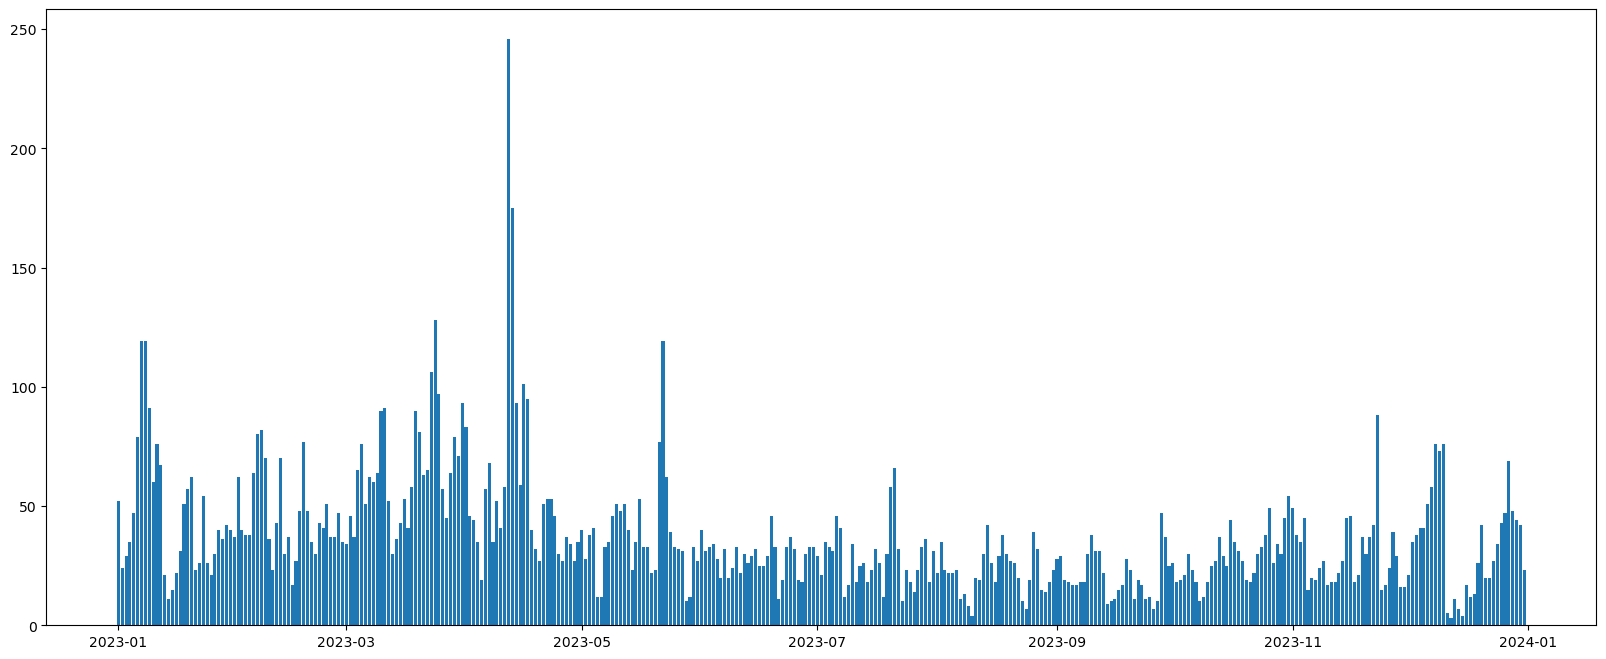

In [117]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(미세먼지_2023['기준_날짜'], 미세먼지_2023['미세먼지(㎍/㎥)'], label = '미세먼지')
# ax.bar(미세먼지_2023['기준_날짜'], 미세먼지_2023['초미세먼지(㎍/㎥)'], label = '초미세먼지')

plt.show()

### 따릉이 데이터

In [3]:
import numpy as np
import pandas as pd

data2 = pd.read_csv('../../Data/따릉이/tpss_bcycl_od_statnhm_20240423.csv', encoding='cp949')

data2 = data2[data2['집계_기준'] != '도착시간']

따릉이_data = data2[['기준_날짜', '기준_시간대', '시작_대여소_ID', '종료_대여소_ID', '전체_건수']]
따릉이_data['기준_시간대'] = 따릉이_data['기준_시간대'].astype(str).apply(lambda x: f"{int(x)//100}시 {int(x)%100}분")


# 출발 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남출발_mask = 따릉이_data['시작_대여소_ID'].isin(강남_대여소_ID)

# 도착 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남도착_mask = 따릉이_data['종료_대여소_ID'].isin(강남_대여소_ID)

# 출발 혹은 도착 대여소 ID가 강남구 대여소 ID에 해당하는 데이터만 남기기
강남_따릉이_data = 따릉이_data[강남출발_mask | 강남도착_mask]

print(강남_따릉이_data)

           기준_날짜   기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수
34      20240423    0시 0분   ST-1365   ST-3188      1
53      20240423    0시 0분   ST-1578   ST-2796      1
75      20240423    0시 0분    ST-187    ST-823      1
76      20240423    0시 0분   ST-1888   ST-1185      1
77      20240423    0시 0분   ST-1893   ST-1560      1
...          ...      ...       ...       ...    ...
296479  20240423  23시 50분   ST-1888   ST-1364      1
296480  20240423  23시 50분   ST-1922    ST-813      1
296542  20240423  23시 50분    ST-815   ST-1247      1
296543  20240423  23시 50분    ST-823    ST-823      1
296808  20240423  23시 55분   ST-1407   ST-1364      1

[6933 rows x 5 columns]


/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_7609/3488095193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  따릉이_data['기준_시간대'] = 따릉이_data['기준_시간대'].astype(str).apply(lambda x: f"{int(x)//100}시 {int(x)%100}분")


In [5]:
gangnam_temp['전체_건수'].unique()

array([1, 2, 6, 3, 4])

In [6]:
gangnam_temp.groupby('기준_날짜')['전체_건수'].agg('sum')

기준_날짜
20240423    7156
Name: 전체_건수, dtype: int64

In [7]:
gangnam_20240423 = gangnam_temp.groupby('기준_날짜')['전체_건수'].agg('sum')
print(gangnam_20240423)
print(type(gangnam_20240423))

기준_날짜
20240423    7156
Name: 전체_건수, dtype: int64
<class 'pandas.core.series.Series'>


2023년 1월 1일 강남구 이용량데이터 

강남 출발 or 강남 도착

In [8]:
import numpy as np
import pandas as pd

data_230101 = pd.read_csv('../../Data/따릉이/tpss_bcycl_od_statnhm_20230101.csv', encoding='cp949')


따릉이_data_230101 = data_230101
따릉이_data_230101['기준_시간대'] = 따릉이_data_230101['기준_시간대'].astype(str).apply(lambda x: f"{int(x)//100}시 {int(x)%100}분")


# 출발 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남출발_mask = 따릉이_data_230101['시작_대여소_ID'].isin(강남_대여소_ID)

# 도착 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남도착_mask = 따릉이_data_230101['종료_대여소_ID'].isin(강남_대여소_ID)

# 출발 혹은 도착 대여소 ID가 강남구 대여소 ID에 해당하는 데이터만 남기기
강남_따릉이_data_230101 = 따릉이_data_230101[강남출발_mask | 강남도착_mask]

print(강남_따릉이_data_230101)

          기준_날짜   기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
64     20230101   1시 15분    ST-808    ST-808      1        0         0
134    20230101   2시 55분   ST-3078   ST-3078      2        0         0
281    20230101   9시 10분   ST-3077   ST-3077      1        0         0
289    20230101   9시 20분   ST-2678   ST-2678      1        1         0
333    20230101  10시 35분   ST-1181   ST-1181      1        0       142
...         ...      ...       ...       ...    ...      ...       ...
72790  20230101  16시 40분   ST-1923   ST-2673      3       21      2527
72796  20230101   17시 0분    ST-899   ST-2868      3       54      5742
72806  20230101  17시 50분    ST-818   ST-1879      3       99      3855
72854  20230101   1시 25분   ST-1880   ST-1654      4       42      5065
72860  20230101   3시 10분   ST-1556    ST-818      4       87      6918

[2310 rows x 7 columns]


강남 출발 & 강남 도착

In [35]:
import numpy as np
import pandas as pd

data_230101 = pd.read_csv('../../Data/따릉이/tpss_bcycl_od_statnhm_20230101.csv',encoding='cp949')

따릉이_data_230101 = data_230101

# 출발 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남출발_mask = 따릉이_data_230101['시작_대여소_ID'].isin(강남_대여소_ID)
강남출발_true_only = 따릉이_data_230101[강남출발_mask]
# print(강남출발_true_only)

# 도착 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남도착_mask = 따릉이_data_230101['종료_대여소_ID'].isin(강남_대여소_ID)
강남도착_true_only = 따릉이_data_230101[강남도착_mask]
# print(강남도착_true_only)

# 출발 혹은 도착 대여소 ID가 강남구 대여소 ID에 해당하는 데이터만 남기기
강남_따릉이_data_230101 = 따릉이_data_230101[강남출발_mask & 강남도착_mask] 

print(강남_따릉이_data_230101)

          기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
64     20230101     115    ST-808    ST-808      1        0         0
134    20230101     255   ST-3078   ST-3078      2        0         0
281    20230101     910   ST-3077   ST-3077      1        0         0
289    20230101     920   ST-2678   ST-2678      1        1         0
333    20230101    1035   ST-1181   ST-1181      1        0       142
...         ...     ...       ...       ...    ...      ...       ...
72409  20230101    2125   ST-1181   ST-1181      2       78      8913
72493  20230101    2315   ST-2673    ST-777      2      285     18776
72763  20230101    1440   ST-1578   ST-1703      3      159      6444
72771  20230101    1510   ST-2927   ST-3049      3       19      1507
72806  20230101    1750    ST-818   ST-1879      3       99      3855

[1367 rows x 7 columns]


In [10]:
gangnam_20230101 = 강남_따릉이_data_230101.groupby('기준_날짜')['전체_건수'].agg('sum')
print(gangnam_20230101)
print(type(gangnam_20230101))

기준_날짜
20230101    2470
Name: 전체_건수, dtype: int64
<class 'pandas.core.series.Series'>


In [16]:
강남_따릉이_data_230101['기준_시간대'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2310 entries, 64 to 72860
Series name: 기준_시간대
Non-Null Count  Dtype 
--------------  ----- 
2310 non-null   object
dtypes: object(1)
memory usage: 36.1+ KB


In [17]:
강남_따릉이_data_230101['기준_날짜'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2310 entries, 64 to 72860
Series name: 기준_날짜
Non-Null Count  Dtype
--------------  -----
2310 non-null   int64
dtypes: int64(1)
memory usage: 36.1 KB


### 2023년 따릉이 일별 이용 총계

In [21]:
import numpy as np
import pandas as pd

data_2023_01_01 = pd.read_csv('../../../../data_semi/강남 따릉이_data/강남_따릉이_data_2023_01_part_1.csv')
data_2023_01_02 = pd.read_csv('../../../../data_semi/강남 따릉이_data/강남_따릉이_data_2023_01_part_2.csv')
data_2023_01_03 = pd.read_csv('../../../../data_semi/강남 따릉이_data/강남_따릉이_data_2023_01_part_3.csv')
data_2023_01_04 = pd.read_csv('../../../../data_semi/강남 따릉이_data/강남_따릉이_data_2023_01_part_4.csv')
data_2023_01_05 = pd.read_csv('../../../../data_semi/강남 따릉이_data/강남_따릉이_data_2023_01_part_5.csv')

In [19]:
data_2023_01_01.tail()

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수
2998008,20230130.0,1735,ST-1321,ST-3073,2
2998009,20230130.0,1735,ST-151,ST-2693,2
2998010,20230130.0,1735,ST-1582,ST-1868,2
2998011,20230130.0,1735,ST-2333,ST-243,2
2998012,20230130.0,1735,ST-37,ST-2531,2


In [20]:
data_2023_01_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998013 entries, 0 to 2998012
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준_날짜      float64
 1   기준_시간대     int64  
 2   시작_대여소_ID  object 
 3   종료_대여소_ID  object 
 4   전체_건수      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.4+ MB


In [25]:
data_2023_01_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998013 entries, 0 to 2998012
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   기준_날짜      float64
 1   기준_시간대     int64  
 2   시작_대여소_ID  object 
 3   종료_대여소_ID  object 
 4   전체_건수      int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.4+ MB


In [24]:
data_2023_01_02.head()

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수
0,20230130.0,1735,ST-819,ST-1882,2
1,20230130.0,1740,ST-10,ST-18,2
2,20230130.0,1740,ST-1574,ST-695,2
3,20230130.0,1740,ST-1575,ST-2986,2
4,20230130.0,1740,ST-1999,ST-1999,2


In [22]:
data_2023_01_02.tail()

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수
2998008,20230219.0,1755,ST-1270,ST-286,1
2998009,20230219.0,1755,ST-1270,ST-3105,1
2998010,20230219.0,1755,ST-1279,ST-1121,1
2998011,20230219.0,1755,ST-1279,ST-2799,1
2998012,20230219.0,1755,ST-1284,ST-1349,1


In [26]:
data_2023_01_01['기준_날짜'] == 2023010.

0          False
1          False
2          False
3          False
4          False
           ...  
2998008    False
2998009    False
2998010    False
2998011    False
2998012    False
Name: 기준_날짜, Length: 2998013, dtype: bool

In [27]:
data_2023_01_01[data_2023_01_01['기준_날짜'] == 20230101.]

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수
0,20230101.0,0,ST-1590,ST-1590,1
1,20230101.0,0,ST-2127,ST-2127,1
2,20230101.0,5,ST-1286,ST-1286,1
3,20230101.0,5,ST-1780,ST-1780,1
4,20230101.0,5,ST-2018,ST-2018,2
...,...,...,...,...,...
72917,20230101.0,210,ST-2826,ST-702,6
72918,20230101.0,450,ST-891,ST-3131,6
72919,20230101.0,255,ST-1420,ST-1842,7
72920,20230101.0,440,ST-1203,ST-2234,8


>> 강남구 데이터만 뽑아서 전처리되어 있지 않음

### 2023년 전체 강남구 이용량

강남 출발 or 강남 도착

In [38]:
import numpy as np
import pandas as pd

data_23 = pd.read_csv('../../../../data_semi/gangnam_2023_combined_data.csv', encoding='utf-8')


따릉이_data_23 = data_23
따릉이_data_23['기준_시간대'] = 따릉이_data_23['기준_시간대'].astype(str).apply(lambda x: f"{int(x)//100}시 {int(x)%100}분")


# 출발 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남출발_mask = 따릉이_data_23['시작_대여소_ID'].isin(강남_대여소_ID)

# 도착 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남도착_mask = 따릉이_data_23['종료_대여소_ID'].isin(강남_대여소_ID)

# 출발 혹은 도착 대여소 ID가 강남구 대여소 ID에 해당하는 데이터만 남기기
강남_따릉이_data_23 = 따릉이_data_23[강남출발_mask | 강남도착_mask]

print(강남_따릉이_data_23)

               기준_날짜   기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수
64        20230101.0   1시 15분    ST-808    ST-808      1
134       20230101.0   2시 55분   ST-3078   ST-3078      2
281       20230101.0   9시 10분   ST-3077   ST-3077      1
289       20230101.0   9시 20분   ST-2678   ST-2678      1
333       20230101.0  10시 35분   ST-1181   ST-1181      1
...              ...      ...       ...       ...    ...
86434150  20231231.0  23시 55분    ST-815   ST-1864      2
86434178  20231231.0  23시 55분   ST-1186   ST-2984      1
86434196  20231231.0  23시 55분   ST-3077   ST-2756      1
86434204  20231231.0  23시 55분   ST-1185   ST-1364      1
86434223  20231231.0  23시 55분    ST-821    ST-769      1

[3472936 rows x 5 columns]


강남 출발 & 강남 도착

In [39]:
import numpy as np
import pandas as pd

data_23 = pd.read_csv('../../../../data_semi/gangnam_2023_combined_data.csv', encoding='utf-8')


따릉이_data_23 = data_23
따릉이_data_23['기준_시간대'] = 따릉이_data_23['기준_시간대'].astype(str).apply(lambda x: f"{int(x)//100}시 {int(x)%100}분")


# 출발 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남출발_mask = 따릉이_data_23['시작_대여소_ID'].isin(강남_대여소_ID)

# 도착 대여소 ID가 강남구 대여소 ID에 해당하는지 확인하는 조건 추가
강남도착_mask = 따릉이_data_23['종료_대여소_ID'].isin(강남_대여소_ID)

# 출발 혹은 도착 대여소 ID가 강남구 대여소 ID에 해당하는 데이터만 남기기
강남_따릉이_data_23 = 따릉이_data_23[강남출발_mask & 강남도착_mask]

print(강남_따릉이_data_23)

               기준_날짜   기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수
64        20230101.0   1시 15분    ST-808    ST-808      1
134       20230101.0   2시 55분   ST-3078   ST-3078      2
281       20230101.0   9시 10분   ST-3077   ST-3077      1
289       20230101.0   9시 20분   ST-2678   ST-2678      1
333       20230101.0  10시 35분   ST-1181   ST-1181      1
...              ...      ...       ...       ...    ...
86433931  20231231.0  23시 45분    ST-803    ST-797      1
86433963  20231231.0  23시 45분   ST-1186   ST-2474      1
86434033  20231231.0  23시 50분   ST-2870    ST-958      1
86434053  20231231.0  23시 50분   ST-1185   ST-1364      1
86434204  20231231.0  23시 55분   ST-1185   ST-1364      1

[1937449 rows x 5 columns]
